In [9]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import logging

from pairwise_network import wandb_api, env, labels

env.set_log_level()

Colors

In [10]:
colormap = ListedColormap([
    'tab:blue',
    'tab:orange',
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:pink',
    (30 / 255, 180 / 255, 220 / 255),
    (130 / 255, 228 / 255, 255 / 255),
    'tab:gray',
    'tab:brown',
])

Runs

In [11]:
# sweep_path = 'jpbeukes27/pairwise/jg1651m1'
sweep_path = 'jpbeukes27/pairwise/1s67lugp'
runs = wandb_api.sweep_to_runs(sweep_path)
# runs = wandb_api.filter_runs_by_cfg(runs, 'lr', 0.01)

Setup

In [12]:
# functions = ('x1*x2', 'x1+x2')
functions = ('x1*x2',)
prune_amounts = (0.1, 0.15, 0.2, 0.25, 0.3)

Plot

ojects/pairwise/out/5y8nbr4s/model.pt.
2020-09-26 14:43:26,655 - INFO - Loading unweighted sn activations from /home/jpb/projects/pairwise/analyse/5y8nbr4s/sn-act.csv.
2020-09-26 14:43:26,658 - INFO - Calculating sn activation distribution.
2020-09-26 14:43:26,663 - INFO - Renaming subnets based on lin 2: ['x1-x2', 'x1', 'bias', 'x2-x3', 'x2', 'x3']
2020-09-26 14:43:26,671 - INFO - Loading partition train from /home/jpb/datasets/art-snd/v2/train.pkl
2020-09-26 14:43:26,674 - INFO - Loading partition valid from /home/jpb/datasets/art-snd/v2/valid.pkl
2020-09-26 14:43:26,678 - INFO - Loading partition eval from /home/jpb/datasets/art-snd/v2/eval.pkl
2020-09-26 14:43:26,686 - INFO - Loading run: misunderstood-sweep-3.
2020-09-26 14:43:26,686 - INFO - Run ID: vybobuks.
2020-09-26 14:43:26,693 - INFO - Pairwise model created:
2020-09-26 14:43:26,693 - INFO - Sequential(
  (lin_1): Linear(in_features=4, out_features=12, bias=False)
  (lin_2): Linear(in_features=12, out_features=60, bias=True

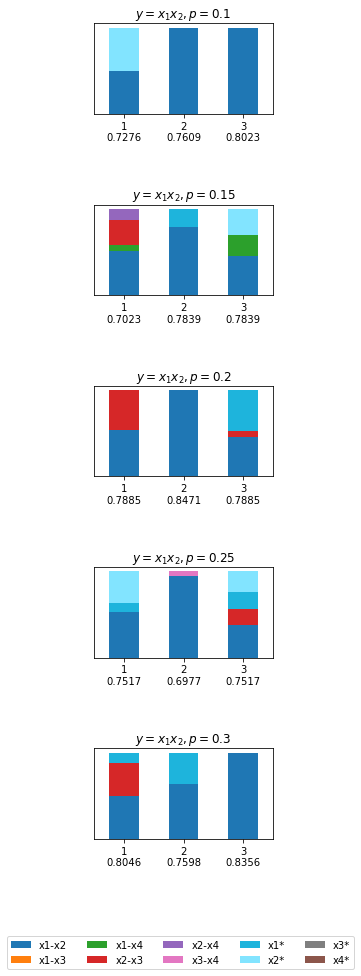

In [13]:
fig, axs = plt.subplots(len(prune_amounts), len(functions), figsize=(3.2, 15),
    gridspec_kw={'wspace':0.1, 'hspace': 1})
axs = axs.flatten()
i = 0
for p in prune_amounts:
    for f in functions:
        filtered = wandb_api.filter_runs_by_cfg(runs, 'prune_amount', p)
        filtered = wandb_api.filter_runs_by_cfg(filtered, 'art_function', f)
        wandb_api.sort_runs_by_config_key(filtered, 'seed', reverse=False)
        if len(filtered) == 0:
            logging.warning(f'No runs found for {f}, {p}')
        else:
            ax = axs[i]
            wandb_api.plot_runs_sn_act_dist(filtered, partition='valid',
                ax=ax, legend=i == len(axs) - 1, cmap=colormap)
            ax.set_title(f'$y={labels.sympy_func_to_latex(f)}, p={p}$')
        i += 1

In [14]:
fig.savefig(os.path.join(env.results_dir, 'art-prune-p-v2.png'))
# fig